## Importing libraries

In [1]:
import pandas as pd
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the sklearn's wines dataset

In [4]:
data = datasets.load_wine()

# Let's see what we have.
#display(data)
# OMG! Another dictionary!!!

# We will not use the 'target' key as we don't want to classify the wines in types.
# we just want to cluster them.
X = pd.DataFrame(data["data"], columns=data["feature_names"])

#print()
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [5]:
X.shape

(178, 13)

In [6]:
data['DESCR']

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

In [7]:
data['data']

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [8]:
data['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

## Scaling features

In [9]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


The scale of "proline" is much bigger than the scale of many other variable!

**K-Means is a distance based algorithm**: we need to scale / normalize!:

In [10]:
import pickle

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
filename = "/content/drive/MyDrive/scaler.pickle" # Path with filename

with open(filename, "wb") as file:
        pickle.dump(scaler,file)

X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X.head())
print()
display(X_scaled_df.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [11]:
X_scaled_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.943708e-15,3.592632e-16,-4.066660e-15,-7.983626e-17,-7.983626e-17,-3.991813e-17,9.979533e-16,-5.588538e-16,-1.656602e-15,-3.442939e-16,1.636643e-15,2.235415e-15,-1.197544e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Now, all features will have the same weight.

## Clustering the wines with K-Means

We will pick manually the number of clusters we want - let's set it to 8. Later we will discuss how many clusters should we have.

When randomness is involved (remember, **K-means picks randomly the initial centroids**), we better use a random seed so that we can reproduce our results. We can set this directly to the argument **random_state**.

In [12]:
kmeans = KMeans(n_clusters=8, random_state=1234)
kmeans.fit(X_scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(random_state=1234)

Now we have our "model", let's get the clusters and how many observations has each cluster.



In [14]:
clusters = kmeans.predict(X_scaled_df)
#clusters
pd.Series(clusters).value_counts().sort_index() # Number of wines in each cluster

0    13
1    23
2    34
3    22
4    25
5    19
6     3
7    39
dtype: int64

Now let's see to which group was assigned every wine.

In [15]:
#X_df = pd.DataFrame(X)
X["cluster"] = clusters
X.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,7
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,7
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,7
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,7
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,5


In [ ]:
# user_scaled = scaler.transform(x_user)
# user_cluster = kmeans.predict(x_user_scaled)
#X[(X['dataset'] == "N") & (X['cluster'] == user_cluster)].sample()

In [17]:
X[X['cluster'] == 7].sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
58,13.72,1.43,2.50,16.7,108.0,3.40,3.67,0.19,2.04,6.80,0.89,2.87,1285.0,7
42,13.88,1.89,2.59,15.0,101.0,3.25,3.56,0.17,1.70,5.43,0.88,3.56,1095.0,7
38,13.07,1.50,2.10,15.5,98.0,2.40,2.64,0.28,1.37,3.70,1.18,2.69,1020.0,7
8,14.83,1.64,2.17,14.0,97.0,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045.0,7
55,13.56,1.73,2.46,20.5,116.0,2.96,2.78,0.20,2.45,6.25,0.98,3.03,1120.0,7


In [18]:
# Determine the features of a "typical" wine of each cluster
pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=X.columns[:-1])

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,12.608462,1.556154,2.035385,16.830769,97.384615,1.819231,1.272308,0.401538,0.922308,3.649231,1.005077,2.009231,571.846154
1,12.405217,2.426957,2.255217,19.230435,92.217391,2.766087,2.694783,0.274783,2.034783,3.484348,1.031739,3.048261,560.695652
2,12.144118,1.885294,2.312647,21.605882,89.294118,2.051176,1.876765,0.406765,1.478824,2.684118,1.055588,2.842353,469.117647
3,13.055455,3.858182,2.423636,21.363636,94.136364,1.639545,0.628182,0.516364,0.969091,5.749091,0.738636,1.821364,625.227273
4,13.273600,3.056400,2.456400,21.800000,102.960000,1.706000,0.938000,0.396800,1.339200,8.951600,0.634000,1.598000,628.600000
5,13.446316,1.955263,2.723158,20.200000,112.894737,2.803684,2.923684,0.342105,1.658421,5.054737,1.117368,3.095789,1059.473684
6,12.336667,1.233333,1.966667,16.866667,149.666667,2.083333,1.800000,0.270000,2.846667,2.950000,1.166667,2.670000,801.666667
7,13.857179,1.886667,2.356667,16.025641,104.923077,2.904615,3.093846,0.267949,2.032308,5.803590,1.048974,3.209231,1145.179487


## Playing with the parameters

**init**: those are the different initialization strategies. By default, sklearn is already using a 'smart' method, not the totally random one we saw.

**n_init**: By default, Scikit-Learn has tried 10 different random initializations and kept the best model.

[Scikitlearn Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

How does Scikit-Learn know which model is the best? It uses a performance metric called **inertia**. **It is the mean squared distance between each instance and its closest centroid**. It's stored in the inertia_ attribute of the model.

In [19]:
kmeans.inertia_

942.574352846782

**max_iter**: It iterates up to 300 times by default (those are the re-computing centroids iterations we saw earlier)

**tol**: This is a way to determine when to stop iterating (if the clusters have changed only veeeery slightly, we assume we have achieved 'convergence')

**algorithm**: There are variations in the implementation of most algorithms and K-Means is no exception. By default, we're using a 'smart' implementation called elkan.

For learning purposes, we will tweak the parameters to replicate the good ol' K-Means - a bit dumber than the Scikit-Learn, yes, but also the original.

In [20]:
kmeans2 = KMeans(n_clusters=8, # Number of clusters/groups
                init="random",
                n_init=3, # Number starting locations for the centroids
                max_iter=2, # Maximum amount of times the centroid's locations are going to be updated (default value = 300)
                tol=0, # Maximum displacement of the centroid's location
                algorithm="full",
                random_state=1234)

kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

974.0164391751496


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1366: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


## Chosing K

We have used K=8 by default for now - but we know that 8 might not be the optimal number of clusters for our dataset. Having a metric like inertia, we can compute it for several K values and then use the "elbow method" to choose the best K.

We will now leave all other parameters with their default value, since it seems to work pretty well.

Training a K-Means model with 2 clusters! 

Initialization complete
Iteration 0, inertia 2739.460560033788.
Iteration 1, inertia 1671.7619094571755.
Iteration 2, inertia 1666.122045463389.
Iteration 3, inertia 1662.1110024033892.
Iteration 4, inertia 1661.6761165626508.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 3279.0363895428995.
Iteration 1, inertia 1691.1106877305929.
Iteration 2, inertia 1676.0207755067095.
Iteration 3, inertia 1665.056564675664.
Iteration 4, inertia 1659.2680772618069.
Iteration 5, inertia 1659.0079672511501.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 2485.442835365548.
Iteration 1, inertia 1671.1260842993406.
Iteration 2, inertia 1661.536851969021.
Iteration 3, inertia 1661.091927360335.
Iteration 4, inertia 1660.7394794968332.
Iteration 5, inertia 1659.9313892786074.
Iteration 6, inertia 1659.0079672511501.
Converged at iteration 6: strict convergence.
Initialization

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 3 clusters! 

Initialization complete
Iteration 0, inertia 2350.5325403188835.
Iteration 1, inertia 1578.287113286242.
Iteration 2, inertia 1461.672997664176.
Iteration 3, inertia 1332.195600923467.
Iteration 4, inertia 1294.7334548531787.
Iteration 5, inertia 1286.5541533173289.
Iteration 6, inertia 1282.9757146734746.
Iteration 7, inertia 1282.4635183465316.
Converged at iteration 7: strict convergence.
Initialization complete


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 1975.4261755106777.
Iteration 1, inertia 1292.2010696035077.
Iteration 2, inertia 1279.958947127011.
Iteration 3, inertia 1279.0541457556008.
Iteration 4, inertia 1277.9284888446423.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2298.1113989273817.
Iteration 1, inertia 1367.5781804013056.
Iteration 2, inertia 1300.9094728977543.
Iteration 3, inertia 1283.207863527228.
Iteration 4, inertia 1280.3053020828124.
Iteration 5, inertia 1279.9661527749454.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1775.968480670606.
Iteration 1, inertia 1308.2485096242742.
Iteration 2, inertia 1285.0630782728344.
Iteration 3, inertia 1279.1840992051702.
Iteration 4, inertia 1277.9284888446423.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 2233.355109427392.
Iteration 1, inertia 1304.016386263266.
Iteration 2, inertia 1282.8450579593414.
Iteration 3, ine

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 4, inertia 1217.838700170475.
Iteration 5, inertia 1208.5575489682656.
Iteration 6, inertia 1205.9821319400683.
Iteration 7, inertia 1204.9813677658817.
Iteration 8, inertia 1204.627801393381.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1999.4291101117167.
Iteration 1, inertia 1220.528979941194.
Iteration 2, inertia 1208.389752549239.
Iteration 3, inertia 1202.4220591140675.
Iteration 4, inertia 1199.0030474139273.
Iteration 5, inertia 1192.7653336920378.
Iteration 6, inertia 1190.629391557028.
Iteration 7, inertia 1190.2678005550958.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1609.498769029898.
Iteration 1, inertia 1215.536354022877.
Iteration 2, inertia 1192.291121326859.
Iteration 3, inertia 1187.458687226049.
Iteration 4, inertia 1185.4714930936334.
Iteration 5, inertia 1184.8646759365463.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 6 clusters! 

Initialization complete
Iteration 0, inertia 1730.398593505166.
Iteration 1, inertia 1156.072374214055.
Iteration 2, inertia 1110.8129719600079.
Iteration 3, inertia 1089.8482565567822.
Iteration 4, inertia 1076.541680554355.
Iteration 5, inertia 1070.2349428451093.
Iteration 6, inertia 1068.6713585668567.
Iteration 7, inertia 1068.0977766809215.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1559.3538268892898.
Iteration 1, inertia 1151.915405197175.
Iteration 2, inertia 1134.9739321306547.
Iteration 3, inertia 1111.1267571270769.
Iteration 4, inertia 1097.5685402242677.
Iteration 5, inertia 1087.2622694256975.
Iteration 6, inertia 1079.7911684454298.
Iteration 7, inertia 1072.9763361856535.
Iteration 8, inertia 1062.7278181116137.
Iteration 9, inertia 1061.490212427404.
Iteration 10, inertia 1058.8647366865061.
Iteration 11, inertia 1056.36535189928.
Iteration 12, inertia 1054.675917616457.
Conver

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 7 clusters! 

Initialization complete
Iteration 0, inertia 1583.3879931958.
Iteration 1, inertia 1091.0101744348315.
Iteration 2, inertia 1044.0093771565332.
Iteration 3, inertia 1017.9270368682057.
Iteration 4, inertia 1012.6236387850479.
Iteration 5, inertia 1008.803540551743.
Iteration 6, inertia 1005.8734664181088.
Iteration 7, inertia 1004.0108896571714.
Iteration 8, inertia 999.3454758264907.
Iteration 9, inertia 999.016221508849.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1463.6622455894594.
Iteration 1, inertia 1037.220212247842.
Iteration 2, inertia 1016.7312471148668.
Iteration 3, inertia 1009.6890214711543.
Iteration 4, inertia 1003.8095512118249.
Iteration 5, inertia 1000.7016015900781.
Iteration 6, inertia 1000.389044917434.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1507.3180253160024.
Iteration 1, inertia 1053.0959155460698.
Iteration 2, inertia 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 8 clusters! 

Initialization complete
Iteration 0, inertia 1453.3238687215394.
Iteration 1, inertia 1010.7273470061654.
Iteration 2, inertia 973.4632645361839.
Iteration 3, inertia 962.4089125724325.
Iteration 4, inertia 954.5759247911018.
Iteration 5, inertia 952.1804103560315.
Iteration 6, inertia 950.8687101814376.
Iteration 7, inertia 948.7928378541201.
Iteration 8, inertia 948.068796574674.
Iteration 9, inertia 947.6096868952968.
Converged at iteration 9: strict convergence.
Initialization complete
Iteration 0, inertia 1381.9452849504364.
Iteration 1, inertia 995.542964296658.
Iteration 2, inertia 979.531974919191.
Iteration 3, inertia 974.809765485136.
Iteration 4, inertia 971.1899525645347.
Iteration 5, inertia 965.2499683962142.
Iteration 6, inertia 963.7502399181169.
Iteration 7, inertia 957.2586361514216.
Iteration 8, inertia 956.8459145214395.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1409.1233589

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 9 clusters! 

Initialization complete
Iteration 0, inertia 1385.64103207688.
Iteration 1, inertia 954.2552001031371.
Iteration 2, inertia 923.0684840725303.
Iteration 3, inertia 918.7050812774437.
Iteration 4, inertia 915.2457099695221.
Iteration 5, inertia 906.5083258859634.
Iteration 6, inertia 902.0521960407117.
Iteration 7, inertia 896.9736232044795.
Iteration 8, inertia 891.0210783522178.
Iteration 9, inertia 888.4173735593454.
Iteration 10, inertia 887.4348853998581.
Converged at iteration 10: strict convergence.
Initialization complete
Iteration 0, inertia 1335.4878807096234.
Iteration 1, inertia 981.0397208232334.
Iteration 2, inertia 945.9173555523662.
Iteration 3, inertia 927.9712217133074.
Iteration 4, inertia 920.0619428898708.
Iteration 5, inertia 917.8908956557525.
Iteration 6, inertia 915.6448254707007.
Iteration 7, inertia 914.8818074934959.
Iteration 8, inertia 913.6835695931368.
Iteration 9, inertia 912.8992884778781.
Iteration 10, inerti

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 10 clusters! 

Initialization complete
Iteration 0, inertia 1318.1890995650706.
Iteration 1, inertia 913.2319363917345.
Iteration 2, inertia 881.8952069089136.
Iteration 3, inertia 872.4000635781463.
Iteration 4, inertia 868.5613021966399.
Iteration 5, inertia 866.5140782010137.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1257.0177227212134.
Iteration 1, inertia 981.8277560781866.
Iteration 2, inertia 956.4106140498214.
Iteration 3, inertia 937.7829451076555.
Iteration 4, inertia 913.0410882632425.
Iteration 5, inertia 903.6715511061822.
Iteration 6, inertia 887.471424606344.
Iteration 7, inertia 882.5294538296002.
Iteration 8, inertia 880.9024877592351.
Iteration 9, inertia 878.4039790756999.
Iteration 10, inertia 875.3484996565596.
Iteration 11, inertia 873.6416832367725.
Iteration 12, inertia 872.692246547309.
Iteration 13, inertia 871.810669143081.
Converged at iteration 13: strict convergence.
Initializat

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 11 clusters! 

Initialization complete
Iteration 0, inertia 1272.6292021084932.
Iteration 1, inertia 886.2468952224456.
Iteration 2, inertia 855.9388465890412.
Iteration 3, inertia 844.7890003175594.
Iteration 4, inertia 840.9502389360529.
Iteration 5, inertia 838.9030149404267.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1240.5913562347373.
Iteration 1, inertia 928.7656383047522.
Iteration 2, inertia 901.0122425418224.
Iteration 3, inertia 879.1134562931081.
Iteration 4, inertia 870.7246676073621.
Iteration 5, inertia 868.427272378401.
Iteration 6, inertia 867.6463258939276.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1270.6684956061922.
Iteration 1, inertia 923.4013900532264.
Iteration 2, inertia 899.7050872334133.
Iteration 3, inertia 881.2979808364123.
Iteration 4, inertia 874.4208807408767.
Iteration 5, inertia 871.501900378239.
Iteration 6, inertia 868.16578

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 12 clusters! 

Initialization complete
Iteration 0, inertia 1201.8802154377117.
Iteration 1, inertia 851.2237229487042.
Iteration 2, inertia 818.9733426851187.
Iteration 3, inertia 809.3009574268102.
Iteration 4, inertia 808.22207716355.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1166.8093518497976.
Iteration 1, inertia 870.2716649997926.
Iteration 2, inertia 820.8784322111107.
Iteration 3, inertia 811.3364286105527.
Iteration 4, inertia 810.1324576496008.
Iteration 5, inertia 809.6698863846718.
Iteration 6, inertia 808.0434399582616.
Iteration 7, inertia 807.3288312473071.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1196.8828653695277.
Iteration 1, inertia 860.5456893755209.
Iteration 2, inertia 831.5123981584964.
Iteration 3, inertia 821.811879676354.
Iteration 4, inertia 815.587278716639.
Iteration 5, inertia 811.2636837335592.
Iteration 6, inertia 808.7218577

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 13 clusters! 

Initialization complete
Iteration 0, inertia 1157.3987602691204.
Iteration 1, inertia 834.727626337735.
Iteration 2, inertia 806.9304694091832.
Iteration 3, inertia 796.9789132389991.
Iteration 4, inertia 795.9000329757389.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1160.1118541803683.
Iteration 1, inertia 843.3681823158397.
Iteration 2, inertia 819.4546500309491.
Iteration 3, inertia 806.5726856030074.
Iteration 4, inertia 800.2185460559676.
Iteration 5, inertia 795.5107630009779.
Iteration 6, inertia 791.2092304567225.
Iteration 7, inertia 790.6643267733957.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1175.9371685927895.
Iteration 1, inertia 811.3798977191165.
Iteration 2, inertia 783.8417311334947.
Iteration 3, inertia 772.9407428392259.
Iteration 4, inertia 769.9969444026885.
Iteration 5, inertia 767.2822255234714.
Iteration 6, inertia 764.2443

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 14 clusters! 

Initialization complete
Iteration 0, inertia 1116.9233464134345.
Iteration 1, inertia 827.4396310892507.
Iteration 2, inertia 791.8793373940655.
Iteration 3, inertia 780.2464463741234.
Iteration 4, inertia 778.8292352681619.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1131.8851764541923.
Iteration 1, inertia 866.827550914747.
Iteration 2, inertia 847.1018269720543.
Iteration 3, inertia 835.7812694867539.
Iteration 4, inertia 829.3488320046711.
Iteration 5, inertia 823.9939614408488.
Iteration 6, inertia 820.8911544953942.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1155.929589878092.
Iteration 1, inertia 823.1999262270626.
Iteration 2, inertia 797.9690774009126.
Iteration 3, inertia 788.778051259708.
Iteration 4, inertia 781.4429797303301.
Iteration 5, inertia 776.3513055650565.
Iteration 6, inertia 774.6243655143528.
Converged at iteration 6: stric

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 15 clusters! 

Initialization complete
Iteration 0, inertia 1085.4648261224934.
Iteration 1, inertia 800.9024458017864.
Iteration 2, inertia 775.9597726269872.
Iteration 3, inertia 764.8015647084949.
Iteration 4, inertia 756.9441550309855.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 1037.9338968385775.
Iteration 1, inertia 803.0137130308099.
Iteration 2, inertia 777.5960986027565.
Iteration 3, inertia 763.1779955995007.
Iteration 4, inertia 754.9537314415559.
Iteration 5, inertia 748.1169665770301.
Iteration 6, inertia 744.645445455475.
Iteration 7, inertia 742.4913404912977.
Iteration 8, inertia 741.4771951411522.
Converged at iteration 8: strict convergence.
Initialization complete
Iteration 0, inertia 1094.9084329637517.
Iteration 1, inertia 797.7397305843573.
Iteration 2, inertia 773.6043288616944.
Iteration 3, inertia 765.3924570862931.
Iteration 4, inertia 754.1485021408704.
Iteration 5, inertia 744.5379

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 16 clusters! 

Initialization complete
Iteration 0, inertia 1046.2965884198502.
Iteration 1, inertia 775.2606250500289.
Iteration 2, inertia 737.8275265793021.
Iteration 3, inertia 725.6238529694358.
Iteration 4, inertia 718.7435903617422.
Converged at iteration 4: strict convergence.
Initialization complete
Iteration 0, inertia 983.9974526557717.
Iteration 1, inertia 734.5898791164042.
Iteration 2, inertia 709.6422301785823.
Iteration 3, inertia 700.6204766369856.
Iteration 4, inertia 697.9279881561024.
Iteration 5, inertia 696.0773763240052.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1084.454990197281.
Iteration 1, inertia 810.9274753540791.
Iteration 2, inertia 775.8042649671697.
Iteration 3, inertia 763.1984237215443.
Iteration 4, inertia 757.2101947181454.
Iteration 5, inertia 752.2059373940835.
Iteration 6, inertia 750.8785581748217.
Iteration 7, inertia 743.6794288211393.
Iteration 8, inertia 743.28265

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 6, inertia 716.1334425799439.
Iteration 7, inertia 715.4057385896555.
Converged at iteration 7: strict convergence.
Initialization complete
Iteration 0, inertia 1050.475024079728.
Iteration 1, inertia 758.8795943103655.
Iteration 2, inertia 719.9723139419959.
Iteration 3, inertia 712.3554627795787.
Iteration 4, inertia 711.0997402277994.
Iteration 5, inertia 709.9282000589824.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1020.9198910326122.
Iteration 1, inertia 765.3611999826592.
Iteration 2, inertia 745.8855961908755.
Iteration 3, inertia 734.0660158062938.
Iteration 4, inertia 731.6592734152788.
Iteration 5, inertia 731.2967934813917.
Converged at iteration 5: strict convergence.
Training a K-Means model with 17 clusters! 

Initialization complete
Iteration 0, inertia 1006.857840661733.
Iteration 1, inertia 751.2643414086601.
Iteration 2, inertia 717.3518007401823.
Iteration 3, inertia 707.4300245956196.
Iteration 4, inertia 70

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Iteration 0, inertia 983.8045908973024.
Iteration 1, inertia 722.3028786573452.
Iteration 2, inertia 697.7524408042617.
Iteration 3, inertia 689.1828438597714.
Iteration 4, inertia 684.207100010461.
Iteration 5, inertia 680.5663695892296.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 1071.068388576981.
Iteration 1, inertia 756.3861537002169.
Iteration 2, inertia 710.5603945926995.
Iteration 3, inertia 701.8894151412807.
Iteration 4, inertia 700.0256286474225.
Iteration 5, inertia 698.7763037232703.
Iteration 6, inertia 698.3747134109569.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 985.3488448379103.
Iteration 1, inertia 768.5947618069106.
Iteration 2, inertia 754.3034352366091.
Iteration 3, inertia 746.7456286977504.
Iteration 4, inertia 741.7569538757971.
Iteration 5, inertia 740.3473650351659.
Iteration 6, inertia 736.3831409268013.
Iteration 7, inertia 733.1656088384643.
Converged at iterati

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 998.4631913197862.
Iteration 1, inertia 733.8963710290316.
Iteration 2, inertia 718.200793420144.
Iteration 3, inertia 711.1420528389615.
Iteration 4, inertia 707.801766538431.
Iteration 5, inertia 703.7154778526008.
Iteration 6, inertia 701.3318603134076.
Iteration 7, inertia 695.0928059970186.
Iteration 8, inertia 691.7210241380412.
Iteration 9, inertia 690.5908079258452.
Iteration 10, inertia 688.971568962538.
Iteration 11, inertia 687.3368435207715.
Converged at iteration 11: strict convergence.
Initialization complete
Iteration 0, inertia 1013.3289376642574.
Iteration 1, inertia 736.5715419801529.
Iteration 2, inertia 711.627822870355.
Iteration 3, inertia 698.7254275158089.
Iteration 4, inertia 692.4926508419601.
Iteration 5, inertia 688.2614839354933.
Iteration 6, inertia 686.9564649726065.
Iteration 7, inertia 685.7963664610206.
Iteration 8, inertia 684.6644123867279.
Iteration 9, inertia 683.5981147877728.
Iteration 10, inertia 680.9127136723207.
Converged

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Initialization complete
Iteration 0, inertia 1006.3477301086903.
Iteration 1, inertia 746.0346656055831.
Iteration 2, inertia 709.0653557958631.
Iteration 3, inertia 695.1838941443966.
Iteration 4, inertia 676.349859186736.
Iteration 5, inertia 669.4586995534237.
Iteration 6, inertia 663.94004773545.
Iteration 7, inertia 661.7739905392298.
Converged at iteration 7: strict convergence.
Training a K-Means model with 20 clusters! 

Initialization complete
Iteration 0, inertia 946.6923806296709.
Iteration 1, inertia 710.6492876556233.
Iteration 2, inertia 685.6159267662019.
Iteration 3, inertia 674.659982142097.
Iteration 4, inertia 668.3079490014757.
Iteration 5, inertia 665.7685905732917.
Converged at iteration 5: strict convergence.
Initialization complete
Iteration 0, inertia 934.0229770482126.
Iteration 1, inertia 667.9204082606163.
Iteration 2, inertia 639.9051478135706.
Iteration 3, inertia 632.1937711922283.
Iteration 4, inertia 631.4776830966546.
Converged at iteration 4: strict c

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Iteration 0, inertia 908.9266408746917.
Iteration 1, inertia 674.6765433497458.
Iteration 2, inertia 645.041572180689.
Iteration 3, inertia 639.1719598199245.
Iteration 4, inertia 637.6014482396531.
Iteration 5, inertia 637.1884235262792.
Converged at iteration 5: strict convergence.


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

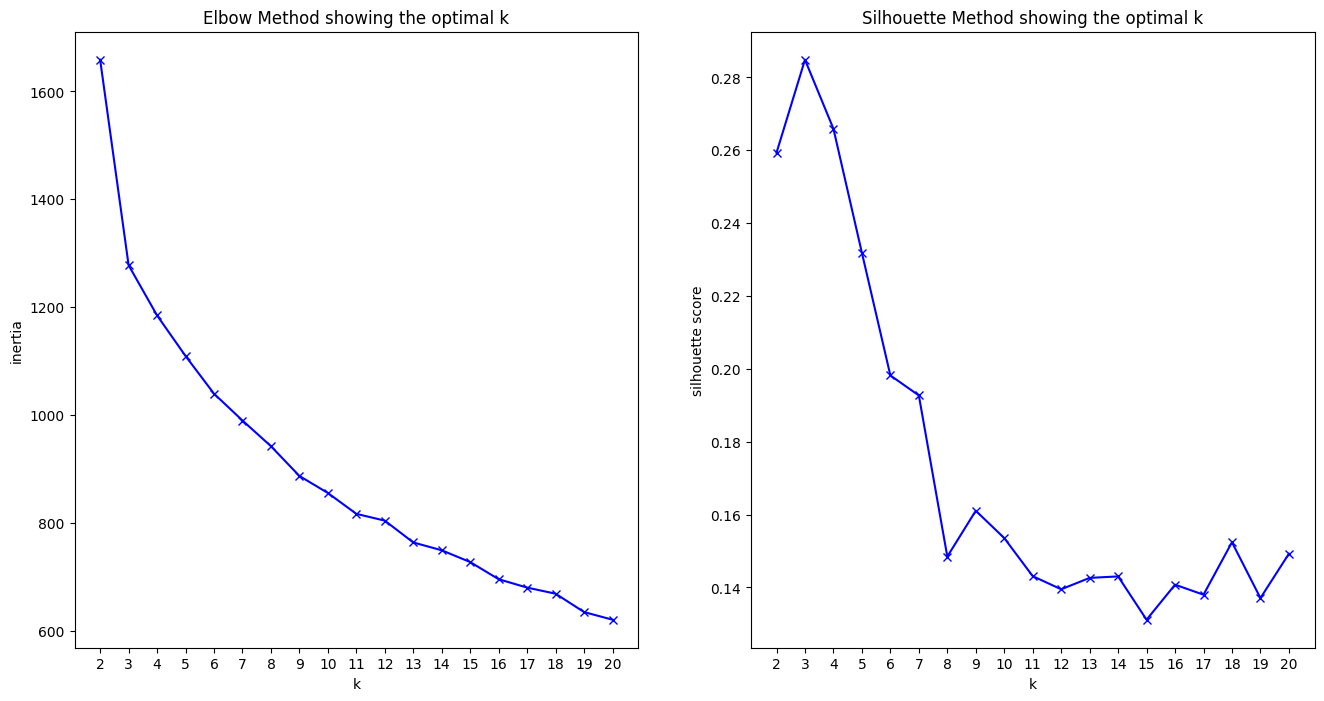

In [21]:
K = range(2, 21)

inertia = []
silhouette = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234,
                    verbose=1)
    kmeans.fit(X_scaled_df)
    
    filename = "/content/drive/MyDrive/kmeans_" + str(k) + ".pickle" # Path with filename # kmeans_n.pickle
    with open(filename, "wb") as file:
        pickle.dump(kmeans,file)

    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].plot(K, inertia, 'bx-')
ax[0].set_xlabel('k')
ax[0].set_ylabel('inertia')
ax[0].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[0].set_title('Elbow Method showing the optimal k')
ax[1].plot(K, silhouette, 'bx-')
ax[1].set_xlabel('k')
ax[1].set_ylabel('silhouette score')
ax[1].set_xticks(np.arange(min(K), max(K)+1, 1.0))
ax[1].set_title('Silhouette Method showing the optimal k')

There seems to be an elbow at **k=3**, and then a very slight one at k=10, but other than that the plot is quite smooth. What if our business needs involv having a k between 5 and 8?

There is another metric that will help us decide.

## Silouhette

There's a metric called **Silhouette Score** that also measures how similar is an observation is to its own cluster compared to other clusters. For the ith observation, the **Silhouette Score** is:

$$s_{K,L} = (b - a) / max(a,b) $$

Where:

a = mean intra-cluster distance (the average distance between i and every other observation in the cluster where i belongs)

$$ a = \frac{1}{n_{K}}\sum_{i,j\neq{i}}^{n_{K}}d(i,j)$$

b = mean **nearest-cluster** distance (the average distance between i and the observations of the nearest cluster that i is not part of it)

$$ b = \frac{1}{(n_{K}*n_{L})}\sum_{i}^{n_{K}}\sum_{j}^{n_{L}}d(i,j)$$

The silhouette score for the whole model is the **average of all the silhouette scores** of each instance.

$$ S = \frac{2}{N(N-1)}\sum_{c}s_{K,L}$$

Because we divide the substraction of (b-a) by the max of the two distances (which will always be b unless the observation has been wrongly assigned to a cluster it should not belong), we obtain a "normalized score", that ranges from -1 to 1, and that makes it easier to interpret.

The greater the Silouhette, the greater the separation between the clusters, In other words, the clusters will be more defined.

Here, we confirm that 3 is the best option, but we also notice that 5 a quite good - it meets the 'technical criteria' of having a better score than its predecessor (4), so if it falls within the range of our business demands - it looks like the best candidate.

# Loading the scaler and the best model

In [22]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as file: 
            return pickle.load(file) 
    except FileNotFoundError: 
        print("File not found!") 


In [23]:
scaler2 = load("/content/drive/MyDrive/scaler.pickle")
scaler2

StandardScaler()

In [24]:
best_model = load("/content/drive/MyDrive/kmeans_9.pickle")

In [ ]:
best_model.predict()

C(N=3000,2)= 3000!/(2!(3000-2)!) = (3000*2999*2998!)/(2!*2998!)=
(3000*2999)/2! = (3000*2999)/2 = 1500*2999

In [ ]:
1500*2999

4498500

In [25]:
new_wine_features_scaled = scaler2.transform(new_wine_features)

NameError: ignored

In [ ]:
best_model.predict(new_wine_features_scaled)

array([0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2,
       0, 3, 3, 3, 0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 7, 0, 0, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 5, 5, 7, 7, 5, 3,
       7, 7, 5, 8, 5, 3, 5, 3, 2, 7, 7, 5, 8, 2, 7, 7, 5, 1, 2, 7, 5, 5,
       5, 5, 5, 5, 5, 2, 7, 8, 4, 7, 7, 2, 7, 7, 2, 7, 7, 5, 7, 5, 7, 2,
       8, 2, 5, 5, 5, 5, 7, 5, 1, 2, 2, 3, 2, 2, 2, 2, 2, 5, 5, 2, 4, 4,
       4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 6, 4, 4, 4, 4, 6,
       6, 1, 6, 6, 6, 6, 1, 1, 1, 1, 6, 1, 6, 6, 6, 4, 1, 6, 6, 1, 6, 6,
       6, 6], dtype=int32)